In [1]:
# linear algebra
import numpy as np

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC

In [2]:
import pandas as pd

sub_df = pd.read_csv("/content/test.csv")
df = pd.read_csv("/content/train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
sub_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.shape, sub_df.shape

((891, 12), (418, 11))

In [6]:
#Find the number duplicate record
print('df - Number of duplicate Record:', df.duplicated().sum())

print('sub_df - Number of duplicate Record:', sub_df.duplicated().sum())

df - Number of duplicate Record: 0
sub_df - Number of duplicate Record: 0


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
sub_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

---
### Label Encoding 'Sex' column

In [9]:
LE = LabelEncoder()
df['Sex'] = LE.fit_transform(df['Sex'])
sub_df['Sex'] = LE.fit_transform(sub_df['Sex'])

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


#### 1 == male and 0 == female
---
### Drop the column 'Cabin' from dataset

In [11]:
df.drop(columns = ['Cabin'], inplace = True)
sub_df.drop(columns = ['Cabin'], inplace = True)

---
### In 'df' column Embarked has 2 missing values we'll fill them with maximum occuring value that is 'S'

In [12]:
df['Embarked'].fillna('S', inplace = True)

---
### In sub_df the column Fare has 1 missing values we'll fill them with mean value of the column

In [13]:
sub_df['Fare'].fillna(sub_df['Fare'].mean(), inplace = True)

In [14]:
# combine datasets
combine = [df, sub_df]

In [15]:
# Convert categorical to numerical features in Embarked column
for dataset in combine:
  dataset['Embarked'] = dataset['Embarked'].map({"S" : 1, "C" : 2, "Q" : 3})

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,1


In [16]:
# We don't need the columns 'Name' and 'Ticket', so remove them
for dataset in combine:
  dataset.drop(columns = ['Name', 'Ticket'], inplace = True)

In [17]:
# Create a new column called 'FamilySize' = SibSp + Parch
for dataset in combine:
  dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
  # +1 will count the passenger himself / herself

In [18]:
# Now let's drop columns SibSp & Parch
for dataset in combine:
  dataset.drop(columns = ['SibSp', 'Parch'], inplace = True)

In [19]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,1,0,3,1,22.0,7.2500,1,2
1,2,1,1,0,38.0,71.2833,2,2
2,3,1,3,0,26.0,7.9250,1,1
3,4,1,1,0,35.0,53.1000,1,2
4,5,0,3,1,35.0,8.0500,1,1


In [20]:
sub_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,892,3,1,34.5,7.8292,3,1
1,893,3,0,47.0,7.0000,1,2
2,894,2,1,62.0,9.6875,3,1
3,895,3,1,27.0,8.6625,1,1
4,896,3,0,22.0,12.2875,1,3


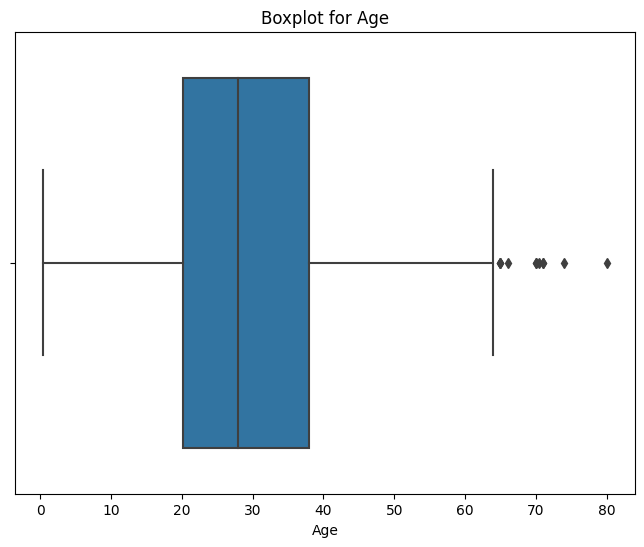

In [21]:
# Now 'Age' column has a lot of missing values, lets see if it has any outliers or not
plt.figure(figsize = (8,6))
sns.boxplot(x = 'Age', data = df, orient = 'v')
plt.title('Boxplot for Age')
plt.xlabel('Age')
plt.show()

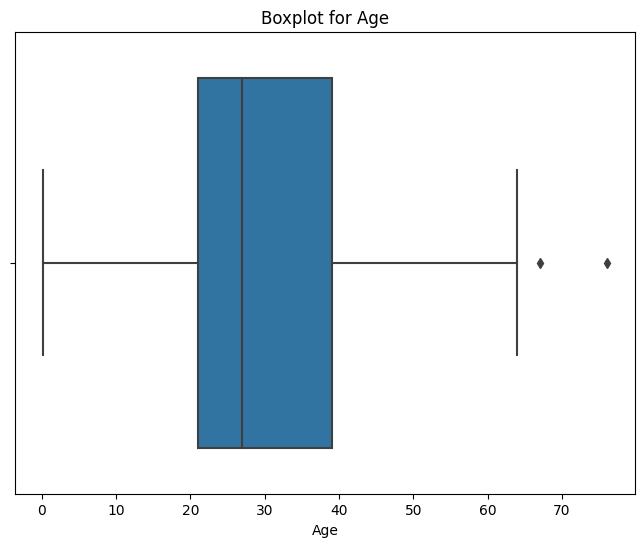

In [22]:
plt.figure(figsize = (8,6))
sns.boxplot(x = 'Age', data = sub_df, orient = 'v')
plt.title('Boxplot for Age')
plt.xlabel('Age')
plt.show()

In [23]:
# Lets fill all missing values with median
for dataset in combine:
  dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   Fare         891 non-null    float64
 6   Embarked     891 non-null    int64  
 7   FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [25]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   Fare         418 non-null    float64
 5   Embarked     418 non-null    int64  
 6   FamilySize   418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


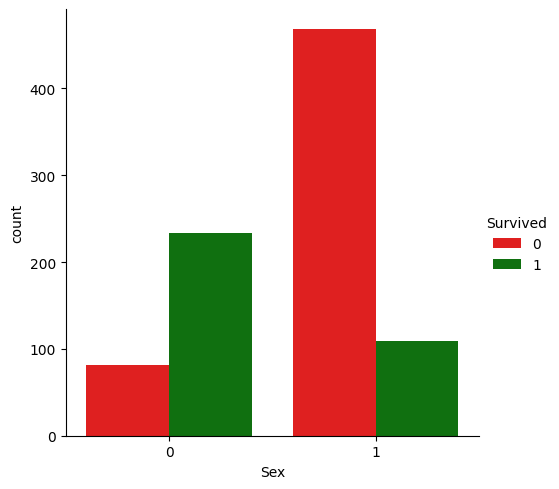

In [26]:
# Survived column is a binary column, where 0 = Passenger Died and 1 = Passenger Survived
my_palette = {"male": "blue", "female": "pink", 0: "red", 1: "green"}
sns.catplot(x = "Sex", hue = "Survived", kind = "count", data = df, palette = my_palette)
plt.show()

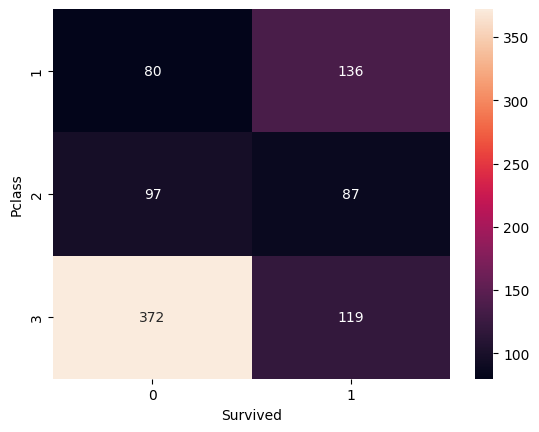

In [27]:
# Now let's see how many people died based on their Pclass: -
group = df.groupby(['Pclass', 'Survived']) # group the 2 columns together
pclass_survived = group.size().unstack() # unstack them by creating a new dataframe

#create a heatmap
sns.heatmap(pclass_survived, annot = True, fmt = "d")
plt.show()

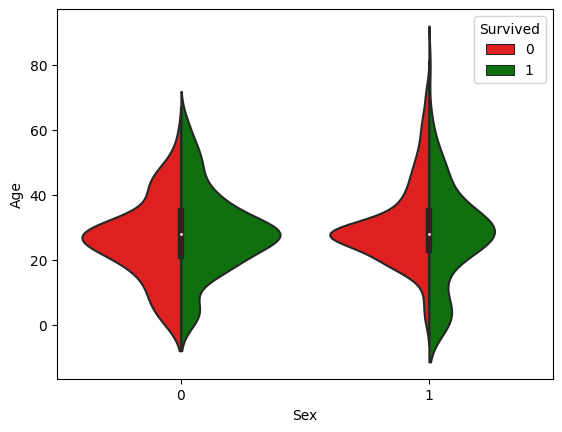

In [28]:
# Let's create a violin plot to find out the correlation between Age and survival rate
sns.violinplot(x = "Sex", y = "Age", hue = "Survived", data = df, palette = my_palette, split = True)
plt.show()

In [29]:
# Let's see exactly how many people died and how many survived (for curiosity)
survived_count= df[df["Survived"] == 1]["Survived"].count()
deceased_count = df[df["Survived"] == 0]["Survived"].count()

# print
print("Total number of people survived is: ", survived_count)
print("Total number of deceased people is: ", deceased_count)

Total number of people survived is:  342
Total number of deceased people is:  549


---
# Model Building

In [31]:
from sklearn.model_selection import train_test_split
X = df.drop('Survived', axis = 1)
y = df['Survived']

# Split the data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Models
# LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

# Random Forest
Forest = RandomForestClassifier()
Forest.fit(X_train, y_train)

# SVM
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [33]:
# Predictions
# LogisticRegression
X_sub = sub_df
LogReg_pred = LogReg.predict(X_valid)

# RandomForest
rf_pred = Forest.predict(X_valid)

# SVM
svm_pred = svm.predict(X_valid)

In [34]:
# Print accuracy
print("Logistic Regression Accuracy: ", accuracy_score(y_valid, LogReg_pred))
print("Random Forest Accuracy: ", accuracy_score(y_valid, rf_pred))
print("SVM Accuracy: ", accuracy_score(y_valid, svm_pred))

Logistic Regression Accuracy:  0.7877094972067039
Random Forest Accuracy:  0.8324022346368715
SVM Accuracy:  0.5977653631284916


In [36]:
# Best model is RandomForest
# Trying XGBoost to get a better result
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Make predictions with both models
xgb_pred = xgb_model.predict(X_valid)

# Combine predictions
ensemble_pred = (rf_pred + xgb_pred) / 2
ensemble_pred_binary = (ensemble_pred >= 0.5).astype(int)

# print accuracy
ensemble_accuracy = accuracy_score(y_valid, ensemble_pred_binary)
print("Ensemble Accuracy Score is: ", ensemble_accuracy)

Ensemble Accuracy Score is:  0.8156424581005587


---
# Conclusion: -
Best Model is Random Forest....